# 활성화 함수
- 딥러닝 모델의 표현력을 향상시켜주기 위해서 임.
- 전문적인 용어로는 모델의 representation capacity 또는 expressivity를 향상시킨다라고도 말함.
- 신경 세포로 치면 세포체에서 일어나는 일을 맡고 있음.
- 들어온 신호가 특정 임게점을 넘으면 출력을 하고, 넘지 못하면 무시를 함.
- 활성화 함수는 신호를 '전달'해주기에 Transfer function으로 알려져있음.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from itertools import product
import tensorflow as tf

tf.random.set_seed(7879)

print('Ready to activate?⤴')

Ready to activate?⤴


## 퍼셉트론
- 딥러닝 모델은 보통 여러 개의 층으로 이루어져 있는데 그 중 하나의 층을 가져와 다시 쪼개면 보통 '노드'라고 불리는 것으로 쪼개어짐.
- 이 노드가 퍼셉트론임

### - 퍼셉트론 구조
- 퍼셉트론에 주어지는 입력은 신경세포에서 가지돌기로 받아들이는 신호에 해당함.
- 각 입력 항에 곱해지는 가중치는 신경 세포들의 연결 부위에 형성된 시냅스의 발달 정도에 해당함.
- xiwi값들은 각 가지돌기에서 시냅스를 거쳐서 오는 신호들에 해당되며 세포체에서 이 신호들은 합쳐짐.
- 편향이라고 불리는 bb라는 신호 또한 합산에 포함.
- 이 합쳐진 신호는 세포체에서 신호를 처리하는 방식과 비슷하게 적절한 활성화 함수(activation function)를 거쳐 출력이 결정됨.
- XX는 합쳐진 신호이며, YY는 퍼셉트론의 최종 출력.

## 비선형 활성화 함수를 주로 사용하는 이유
- 딥러닝 모델의 표현력을 향상시키기 위해서.
- 선형 활성화 함수를 사용하면 노드의 개수를 아무리 많이 붙여도 하나의 노드를 사용하는 것과 차이가 없음.

## 이진 계단 함수
- 이 함수로 들어온 입력이 특정 임계점을 넘으면 11(혹은 True)를 출력하고 그렇지 않을 때는 00을 출력함.
- 이진 분류 문제에서 꽤 유용하게 쓰임.

In [2]:
def binary_step(x, threshold=0): 
# threshold가 있는 함수를 쓰면 꼭 defualt 값을 설정해야함.
    return 0 if x<threshold else 1

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def plot_and_visulize(image_url, function, derivative=False):
    X = [-10 + x/100 for x in range(2000)]
    y = [function(y) for y in X]
    
    plt.figure(figsize=(12,12))
    
    # 함수 그래프
    plt.subplot(3,2,1)
    plt.title('function')
    plt.plot(X,y)
    
    # 함수의 미분 그래프
    plt.subplot(3,2,2)
    plt.title('derivative')
    if derivative:
        dev_y = [derivative(y) for y in X]
        plt.plot(X,dev_y)
    
    # 무작위 샘플들 분포
    samples = np.random.rand(1000)
    samples -= np.mean(samples)
    plt.subplot(3,2,3)
    plt.title('samples')
    plt.hist(samples,100)
    
    # 활성화 함수를 통과한 샘플들 분포
    act_values = [function(y) for y in samples]
    plt.subplot(3,2,4)
    plt.title('activation values')
    plt.hist(act_values,100)
    
    # 원본 이미지
    image = np.array(Image.open(image_url), dtype=np.float64)[:,:,0]/255. # 구분을 위해 gray-scale해서 확인
    image -= np.median(image)
    plt.subplot(3,2,5)
    plt.title('origin image')
    plt.imshow(image, cmap='gray')
    
    # 활성화 함수를 통과한 이미지
    activation_image = np.zeros(image.shape)
    h, w = image.shape
    for i in range(w):
        for j in range(h):
            activation_image[j][i] += function(image[j][i])
    plt.subplot(3,2,6)
    plt.title('activation results')
    plt.imshow(activation_image, cmap='gray')
    
    return plt

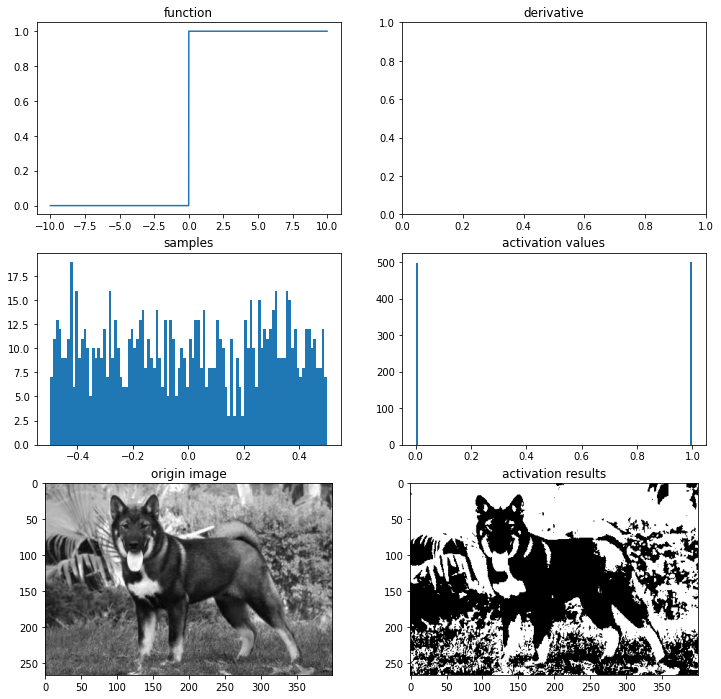

In [4]:
import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'
ax = plot_and_visulize(img_path, binary_step)
ax.show()

In [5]:
#단층 퍼셉트론에서 이진 계단 함수가 많이 사용 됨.

# 퍼셉트론
class Perceptron(object):
    def __init__(self, input_size, activation_ftn, threshold=0, learning_rate=0.01):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn(1)
        self.activation_ftn = np.vectorize(activation_ftn)
        self.learning_rate = learning_rate
        self.threshold = threshold

    def train(self, training_inputs, labels, epochs=100, verbose=1):
        '''
        verbose : 0-매 에포크 결과 출력, 
                  1-마지막 결과만 출력 
        '''
        for epoch in range(epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.__call__(inputs)
                self.weights += self.learning_rate * (label - prediction) * inputs
                self.bias += self.learning_rate * (label - prediction)
            if verbose == 1:
                pred = self.__call__(training_inputs)
                accuracy = np.sum(pred==labels)/len(pred)
                print(f'{epoch}th epoch, accuracy : {accuracy}')
        if verbose == 0:
            pred = self.__call__(training_inputs)
            accuracy = np.sum(pred==labels)/len(pred)
            print(f'{epoch}th epoch, accuracy : {accuracy}')
    
    def get_weights(self):
        return self.weights, self.bias
                
    def __call__(self, inputs):
        summation = np.dot(inputs, self.weights) + self.bias
        return self.activation_ftn(summation, self.threshold)

- 이러한 신경망은 선형적으로 구분 가능한(linearly separable) 문제(예를 들면, AND gate 또는 OR gate)를 구현할 수 있음.
- 하나의 선으로 구분할 수 있는 문제를 풀 수 있는 것.

In [6]:
def scatter_plot(plt, X, y, threshold = 0, three_d=False):
    ax = plt
    if not three_d:
        area1 = np.ma.masked_where(y <= threshold, y)
        area2 = np.ma.masked_where(y > threshold, y+1)
        ax.scatter(X[:,0], X[:,1], s = area1*10, label='True')
        ax.scatter(X[:,0], X[:,1], s = area2*10, label='False')
        ax.legend()
    else:
        area1 = np.ma.masked_where(y <= threshold, y)
        area2 = np.ma.masked_where(y > threshold, y+1)
        ax.scatter(X[:,0], X[:,1], y-threshold, s = area1, label='True')
        ax.scatter(X[:,0], X[:,1], y-threshold, s = area2, label='False')
        ax.scatter(X[:,0], X[:,1], 0, s = 0.05, label='zero', c='gray')
        ax.legend()
    return ax

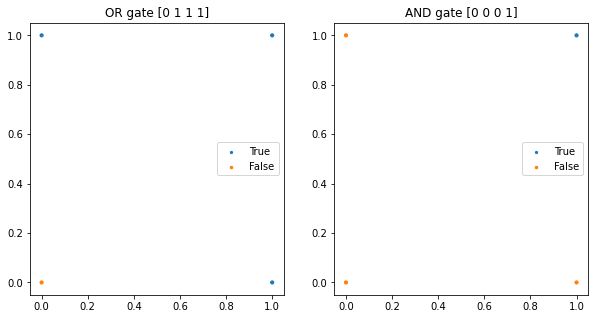

In [7]:
# AND gate, OR gate
X = np.array([[0,0], [1,0], [0,1], [1,1]])

plt.figure(figsize=(10,5))
# OR gate
or_y = np.array([x1 | x2 for x1,x2 in X])
ax1 = plt.subplot(1,2,1)
ax1.set_title('OR gate ' + str(or_y))
ax1 = scatter_plot(ax1, X, or_y)

# AND gate
and_y = np.array([x1 & x2 for x1,x2 in X])
ax2 = plt.subplot(1,2,2)
ax2.set_title('AND gate ' + str(and_y))
ax2 = scatter_plot(ax2, X, and_y)

plt.show()

In [8]:
# OR gate
or_p = Perceptron(input_size=2, activation_ftn=binary_step)
or_p.train(X, or_y, epochs=1000, verbose=0)
print(or_p.get_weights()) # 가중치와 편향값은 훈련마다 달라질 수 있습니다.

# AND gate
and_p = Perceptron(input_size=2, activation_ftn=binary_step)
and_p.train(X, and_y, epochs=1000, verbose=0)
print(and_p.get_weights()) # 가중치와 편향값은 훈련마다 달라질 수 있습니다.

999th epoch, accuracy : 1.0
(array([0.55962117, 0.01043586]), array([-0.00413045]))
999th epoch, accuracy : 1.0
(array([0.62868956, 0.02533228]), array([-0.64430287]))


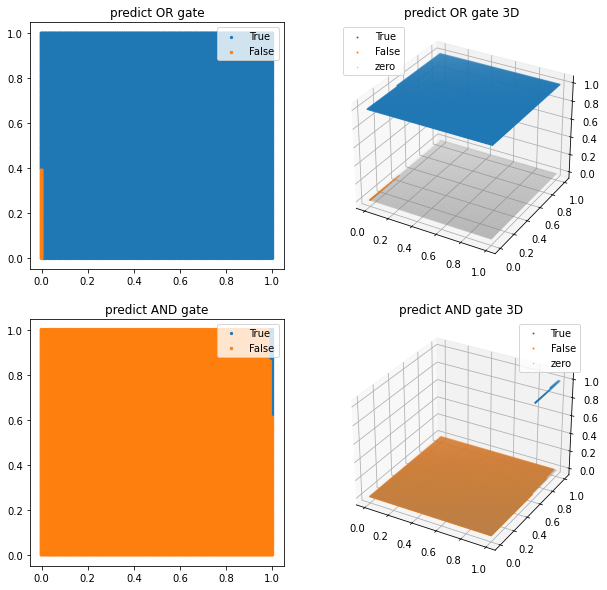

In [9]:
from itertools import product

# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_or_y = or_p(test_X)
pred_and_y = and_p(test_X)

plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
ax1.set_title('predict OR gate')
ax1 = scatter_plot(ax1, test_X, pred_or_y)

ax2 = plt.subplot(2,2,2, projection='3d')
ax2.set_title('predict OR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_or_y, three_d=True)

ax3 = plt.subplot(2,2,3)
ax3.set_title('predict AND gate')
ax3 = scatter_plot(ax3, test_X, pred_and_y)

ax4 = plt.subplot(2,2,4, projection='3d')
ax4.set_title('predict AND gate 3D')
ax4 = scatter_plot(ax4, test_X, pred_and_y, three_d=True)

plt.show()

- 단층 퍼셉트론을 훈련할 때 마다 다르게 그려질 것.
- OR gate와 AND gate의 accuracy를 1.0으로 만드는 퍼셉트론의 최적 가중치 값은 하나로 정해져 있지 않음. 
- 이 가중치에 의해 결정되는 그래프의 모양도 계속 달라짐.
- 퍼셉트론의 가중치가 결정짓는 경계선을 기준으로 [[0,0], [1,0], [0,1], [1,1]] 이상 4개의 점에서의 OR gate, AND gate의 진릿값이 정확한가 ?? 

### 이진 계단 함수의 한계 1

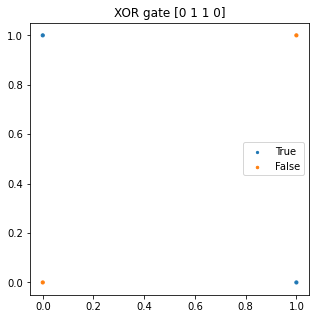

In [10]:
# XOR gate
threshold = 0
X = np.array([[0,0], [1,0], [0,1], [1,1]])

plt.figure(figsize=(5,5))
xor_y = np.array([x1 ^ x2 for x1,x2 in X])
plt.title('XOR gate '+ str(xor_y))
plt = scatter_plot(plt, X, xor_y)
plt.show()

999th epoch, accuracy : 0.25
(array([-0.01195042, -0.00643523]), array([0.00233855]))


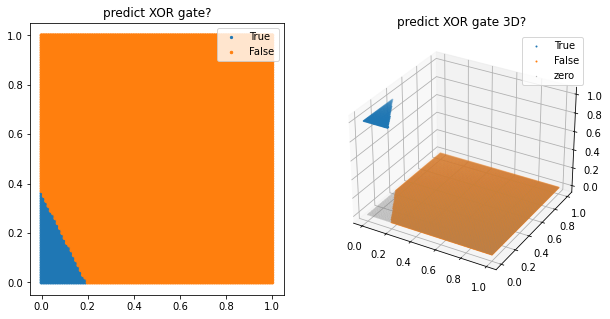

In [11]:
# XOR gate가 풀릴까?
xor_p = Perceptron(input_size=2, activation_ftn=binary_step, threshold=threshold)
xor_p.train(X, xor_y, epochs=1000, verbose=0)
print(xor_p.get_weights())

# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_xor_y = xor_p(test_X)

plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
ax1.set_title('predict XOR gate?')
ax1 = scatter_plot(ax1, test_X, pred_xor_y)

ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_title('predict XOR gate 3D?')
ax2 = scatter_plot(ax2, test_X, pred_xor_y, three_d=True)

plt.show()

- 단층 퍼셉트론은 이 XOR gate를 구현할 수 없음. 
- 왜냐하면 XOR gate의 진릿값 그래프를 하나의 선으로 구분을 할 수 없기 때문에.
- 이를 해결하려면 여러 층을 쌓아 다층 퍼셉트론을 만들어야 함.

### 이진 계단 함수의 한계 2
- 역전파 알고리즘을 사용 못 함.
- 0에서는 미분이 안되고 0인 부분을 제외하고 미분을 한다 해도 미분값이 전부 0이 나옴.
- 때문에 역전파에서 가중치들이 업데이트 되지 않음.
- 상대적으로 비효율적인 업데이트 방법을 사용해야 함.

### 이진 계단 함수의 한계 3
- 다중 출력을 못 함.
- 출력을 1 또는 0으로 밖에 못하기 때문에 다양한 클래스를 구분해야 하는 문제에서는 사용할 수 없음.

## 선형 활성화 함수
- 선형인 호라성화 함수로 다중 출력이 가능함.
- 이진 분류, 간단한 다중 분류 문제까지도 해결할 수 있음.
- 미분이 가능하기 때문에 역전파 알고리즘 또한 사용할 수 있음.

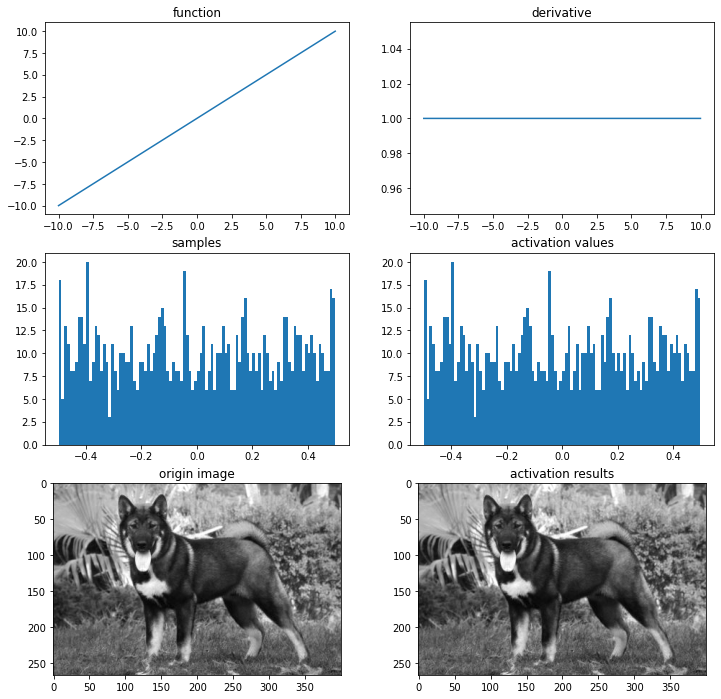

In [12]:
import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'

# 선형 함수
def linear(x):
    return x

def dev_linear(x):
    return 1

# 시각화
ax = plot_and_visulize(img_path, linear, dev_linear)
ax.show()

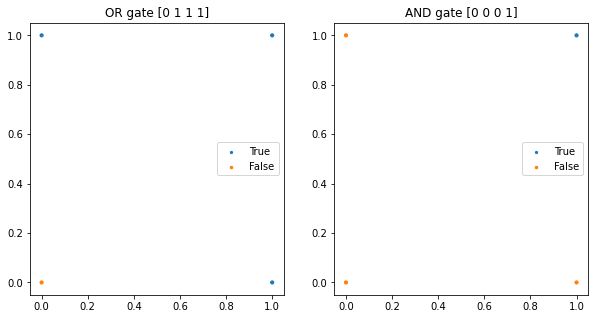

In [13]:
# AND gate, OR gate
threshold = 0
X = np.array([[0,0], [1,0], [0,1], [1,1]])

plt.figure(figsize=(10,5))
# OR gate
or_y = np.array([x1 | x2 for x1,x2 in X])
ax1 = plt.subplot(1,2,1)
ax1.set_title('OR gate ' + str(or_y))
ax1 = scatter_plot(ax1, X, or_y)

# AND gate
and_y = np.array([x1 & x2 for x1,x2 in X])
ax2 = plt.subplot(1,2,2)
ax2.set_title('AND gate ' + str(and_y))
ax2 = scatter_plot(ax2, X, and_y)

plt.show()

In [14]:
import tensorflow as tf

# OR gate model
or_linear_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,), dtype='float64'),
    tf.keras.layers.Dense(1, activation='linear')
])
or_linear_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
or_linear_model.summary()

# AND gate model
and_linear_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,), dtype='float64'),
    tf.keras.layers.Dense(1, activation='linear')
])
and_linear_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
and_linear_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [15]:
or_linear_model.fit(X, or_y, epochs=1000, verbose=0)
and_linear_model.fit(X, and_y, epochs=1000, verbose=0)
print('done')

done


/opt/conda/lib/python3.7/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


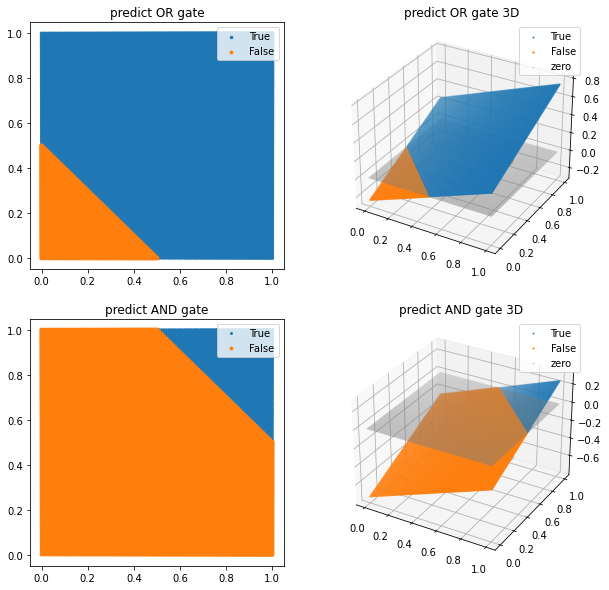

In [16]:
# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_or_y = or_linear_model(test_X)
pred_and_y = and_linear_model(test_X)

plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
ax1.set_title('predict OR gate')
ax1 = scatter_plot(ax1, test_X, pred_or_y, threshold=0.5)

ax2 = plt.subplot(2,2,2, projection='3d')
ax2.set_title('predict OR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_or_y, threshold=0.5, three_d=True)

ax3 = plt.subplot(2,2,3)
ax3.set_title('predict AND gate')
ax3 = scatter_plot(ax3, test_X, pred_and_y, threshold=0.5)

ax4 = plt.subplot(2,2,4, projection='3d')
ax4.set_title('predict AND gate 3D')
ax4 = scatter_plot(ax4, test_X, pred_and_y, threshold=0.5, three_d=True)

plt.show()

- 선형 활성화를 사용한 단층 퍼셉트론이 정확한 값을 예측하는 것은 아님.
- 첫 번째 AND gate를 구현하기 위한 모델에 [[0,0],[0,1],[1,0],[1,1]]을 넣으면 나오는 출력값은 [[-0.25],[0.25],[0.25],[0.75]]
- 두 번째 OR gate를 구현하기 위한 모델에 [[0,0],[0,1],[1,0],[1,1]]를 넣으면 출력값은 [[0.25],[0.75],[0.75],[1.25]]
- 결과가 유사하다는 표현을 하고 있지만, 만약 0.50.5를 기준으로 기준보다 높으면 11이고 낮으면 0을 출력하게 한다면, 이 모델들은 AND gate와 OR gate를 완벽히 구현한다고 말할 수 있음.

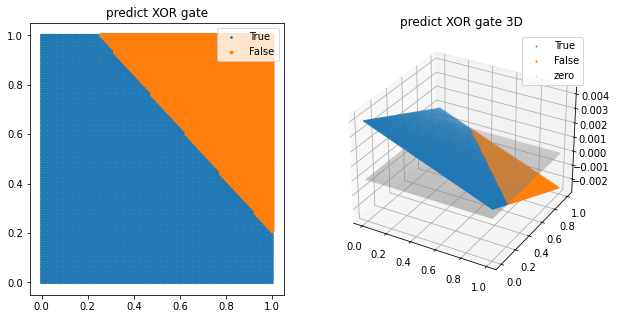

In [17]:
# XOR gate
xor_linear_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,), dtype='float64'),
    tf.keras.layers.Dense(1, activation='linear')
])
xor_linear_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
xor_linear_model.fit(X, xor_y, epochs=1000, verbose=0)

# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_xor_y = xor_linear_model(test_X)

plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
ax1.set_title('predict XOR gate')
ax1 = scatter_plot(ax1, test_X, pred_xor_y, threshold=0.5)

ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_title('predict XOR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_xor_y, threshold=0.5, three_d=True)

plt.show()

- 선 하나로는 나눌 수 없기 때문에 XOR gate를 구현할 수 없음.

### 선형 활성화 함수의 한계
- 모델에 선형 활성화 함수를 사용하면 비선형적 특성을 지닌 데이터를 예측할 수 없음.

## 비선형 활성화 함수 - 시그모이드
- 시그모이드의 입력값이 0 이상일 때 활성화가 되고, 0보다 작을 때 비활성화 됨.
- 입력값에 '무관하게' 0∼1 사이의 값으로 출력하는 특징.
- 참=0, 거짓=1 로 대응 시켜 구분할 수 있으므로 "참" / "거짓" 혹은 "앞면" / "뒷면" 처럼 2가지 상황을 구분할 때 용이함.
- 활성화와 비활성화의 조건을 0.50.5로 잡았으니, 시그모이드는 00 이상일 때 활성화가 되고, 00 보다 작을 때 비활성화된다고 말할 수 있음.


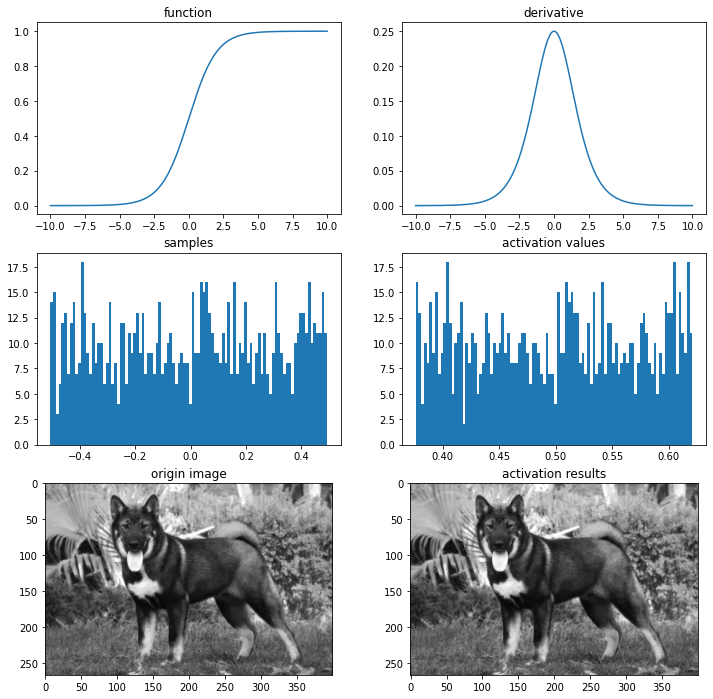

In [18]:
import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'

# 시그모이드 함수
def sigmoid(x):
    return 1/(1+np.exp(-x).astype(np.float64))

def dev_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

# 시각화
ax = plot_and_visulize(img_path, sigmoid, dev_sigmoid)
ax.show()

- 아주 작은 h를 선언하면 컴퓨터는 그냥 0으로 인식해버림

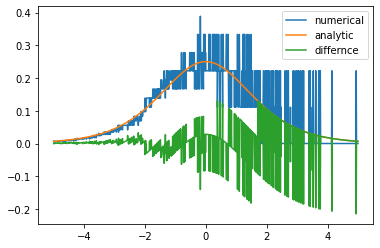

In [19]:
# 수치 미분
def num_derivative(x, function):
    h = 1e-15 # 이 값을 바꾸어 가며 그래프를 확인해 보세요
    numerator = function(x+h)-function(x)
    return numerator/h

# 두 그래프의 차이
diff_X = [-5+x/100 for x in range(1001)]
dev_y = np.array([dev_sigmoid(x) for x in diff_X])
num_dev_y = np.array([num_derivative(x, sigmoid) for x in diff_X])

diff_y = dev_y - num_dev_y
plt.plot(diff_X, num_dev_y, label='numerical')
plt.plot(diff_X, dev_y, label='analytic')
plt.plot(diff_X, diff_y, label='differnce')
plt.legend()

plt.show()

### 시그모이드 단점
1. 0 또는 1에서 포화 됨.
- 그래디언트가 0과 아주 가까워지므로 가중치 업데이트가 일어나지 않게 됨.
- 그래디언트를 죽이게 되는 것.
- 많은 에포크를 돌려도 훈련이 거의 되지 않음.

2. 출력이 0 중심(zero-centered)이 아님.
- 훈련의 시간이 오래 걸리게 됨.
- upstream gradient의 부호에 따라 노드의 가중치 방향이 업데이트 됨.
- 최적값을 향해 직선적으로 업데이트 되는 것 보다 훨씬 오래 걸림.

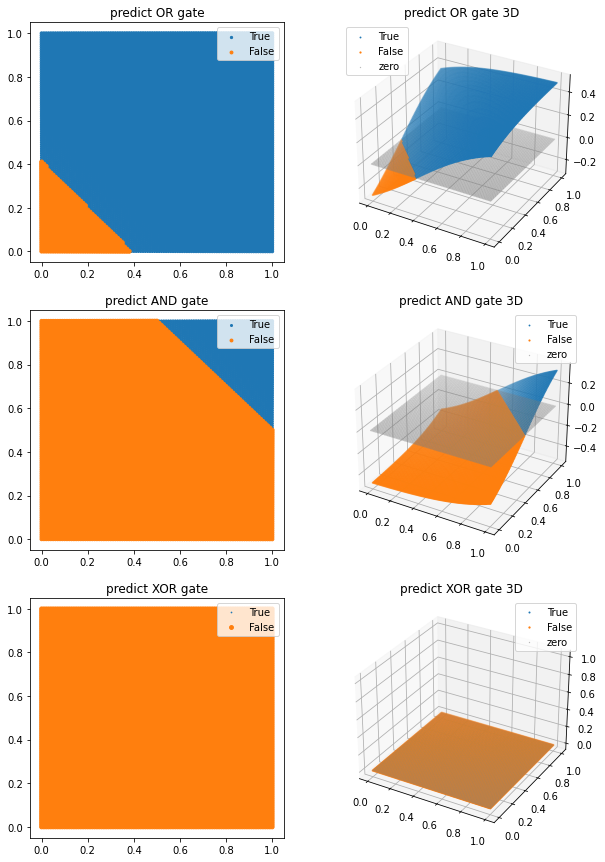

In [20]:
# OR gate
or_sigmoid_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
or_sigmoid_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
or_sigmoid_model.fit(X, or_y, epochs=1000, verbose=0)

# AND gate
and_sigmoid_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
and_sigmoid_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
and_sigmoid_model.fit(X, and_y, epochs=1000, verbose=0)

# XOR gate
xor_sigmoid_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
xor_sigmoid_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
xor_sigmoid_model.fit(X, xor_y, epochs=1000, verbose=0)

# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_or_y = or_sigmoid_model(test_X)
pred_and_y = and_sigmoid_model(test_X)
pred_xor_y = xor_sigmoid_model(test_X)

plt.figure(figsize=(10,15))
ax1 = plt.subplot(3,2,1)
ax1.set_title('predict OR gate')
ax1 = scatter_plot(ax1, test_X, pred_or_y, threshold=0.5)

ax2 = plt.subplot(3,2,2, projection='3d')
ax2.set_title('predict OR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_or_y, threshold=0.5, three_d=True)

ax3 = plt.subplot(3,2,3)
ax3.set_title('predict AND gate')
ax3 = scatter_plot(ax3, test_X, pred_and_y, threshold=0.5)

ax4 = plt.subplot(3,2,4, projection='3d')
ax4.set_title('predict AND gate 3D')
ax4 = scatter_plot(ax4, test_X, pred_and_y, threshold=0.5, three_d=True)

ax5 = plt.subplot(3,2,5)
ax5.set_title('predict XOR gate')
ax5 = scatter_plot(ax5, test_X, pred_xor_y, threshold=0.5)

ax6 = plt.subplot(3,2,6, projection='3d')
ax6.set_title('predict XOR gate 3D')
ax6 = scatter_plot(ax6, test_X, pred_xor_y, threshold=0.5, three_d=True)

plt.show()

- XOR gate는 제대로 구현하지 못한 것을 확인 할 수 있음.
- 이것이 비선형 함수들도 XOR gate를 구현하지 못한다는 것은 아니지만 좀 더 특수한 비선형 함수가 필요함.
- 2차 다항식(quadratic polynomial)을 추가한 시그모이드 함수를 사용한다면 XOR gate를 구현할 수 있음.

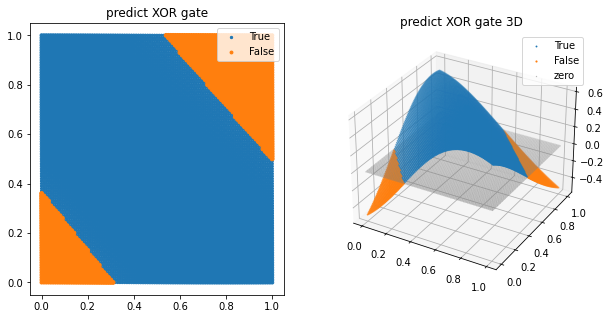

In [21]:
# 레이어를 추가했을 때
# XOR gate
xor_sigmoid_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(2, activation='sigmoid'), # 2 nodes로 변경
    tf.keras.layers.Dense(1)
])
xor_sigmoid_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
xor_sigmoid_model.fit(X, xor_y, epochs=1000, verbose=0)

plt.figure(figsize=(10,5))
pred_xor_y = xor_sigmoid_model(test_X)

ax1 = plt.subplot(1,2,1)
ax1.set_title('predict XOR gate')
ax1 = scatter_plot(ax1, test_X, pred_xor_y, threshold=0.5)

ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_title('predict XOR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_xor_y, threshold=0.5, three_d=True)

plt.show()

## softmax
- 각 class의 확률을 구할 때 사용함.
- 가위바위보 문제라던가 사진 클래스 분류 문제 같은.
- softmax는 각 class의 확률값, 즉 (0.2, 0.5, 0.3)(0.2,0.5,0.3) 이렇게 출력값을 줌.
- 확률의 성질인 모든 경우의 수(=모든 class)의 확률을 더하면 11이 되는 성질을 가지고 있음.
- 그래서 모델의 마지막 layer에서 활용 됨.

## 비선형 활성화 함수 - 하이퍼볼릭 탄젠트 (tanh(x))
- 쌍곡선 함수 중 하나. 
- zero-centered
- 더 빨리 훈련됨.

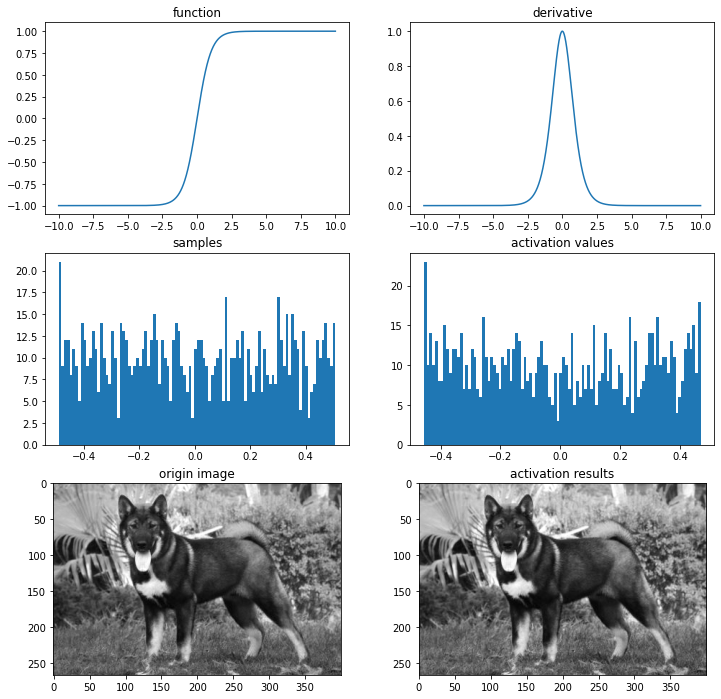

In [22]:
import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'

# 하이퍼볼릭 탄젠트 함수
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def dev_tanh(x):
    return 1-tanh(x)**2

# 시각화
ax = plot_and_visulize(img_path, tanh, dev_tanh)
ax.show()


### tanh 단점
- 그래프에서도 알 수 있듯 -1 또는 1에서 포화 됨.

## 비선형 활성화 함수 - ReLU
- exponential과 같은 연산을 사용하지 않기 때문에 처리 속도가 빠름.
- 0을 제외한 구간에서 미분이 가능함.
- 그래디언트를 구하는 과정에서 0이 주어지면 일반적으로 무작위하게 0 또는 1을 출력함.

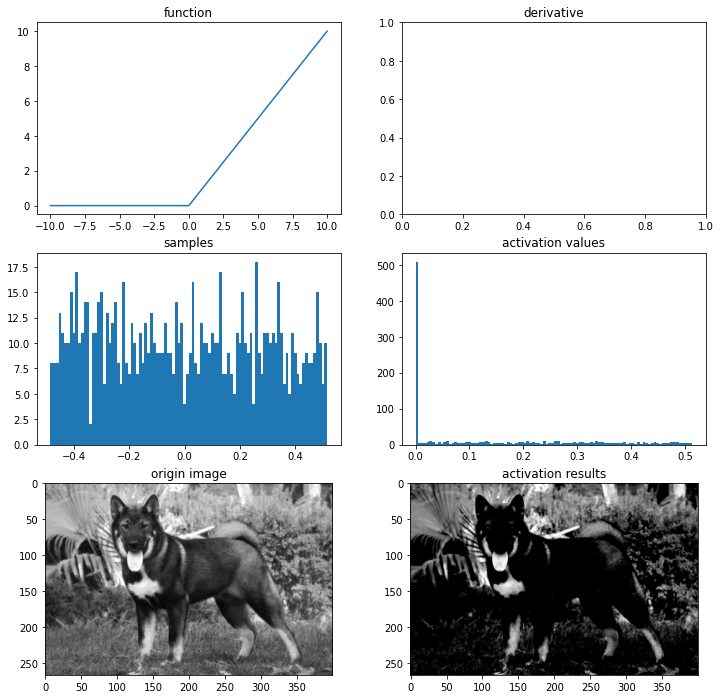

In [23]:
import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'

# relu 함수
def relu(x):
    return max(0,x)

# 시각화
ax = plot_and_visulize(img_path, relu)
ax.show()

### ReLU는 y=x^2 함수도 표현할 수 있는가? Yes

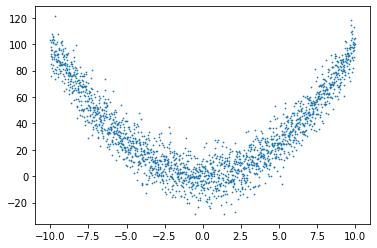

In [24]:
q_X = np.array([-10+x/100 for x in range(2001)])
q_y = np.array([(x)**2 + np.random.randn(1)*10 for x in q_X])
plt.scatter(q_X, q_y, s=0.5)

In [25]:
approx_relu_model_p = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(6, activation='relu'), # 6 nodes 병렬 연결
    tf.keras.layers.Dense(1)
])
approx_relu_model_p.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), metrics=['accuracy'])
approx_relu_model_p.fit(q_X, q_y, batch_size=32, epochs=100, verbose=0)

approx_relu_model_s = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(2, activation='relu'),# 2 nodes 직렬로 3번 연결
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1)
])
approx_relu_model_s.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), metrics=['accuracy'])
approx_relu_model_s.fit(q_X, q_y, batch_size=32, epochs=100, verbose=0)

approx_relu_model_p.summary()
approx_relu_model_s.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 6)                 12        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 6         
____________________________________

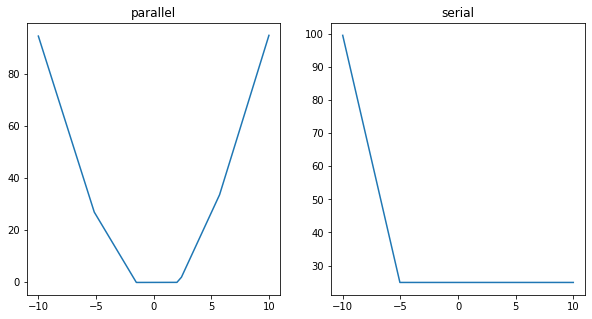

In [26]:
q_test_X = q_X.reshape((*q_X.shape,1))
plt.figure(figsize=(10,5))

ax1 = plt.subplot(1,2,1)
ax1.set_title('parallel')
pred_y_p = approx_relu_model_p(q_test_X)
ax1.plot(q_X, pred_y_p)

ax2 = plt.subplot(1,2,2)
ax2.set_title('serial')
pred_y_s = approx_relu_model_s(q_test_X)
ax2.plot(q_X, pred_y_s)

plt.show()

### ReLU 단점
- 출력값이 0이 중심이 아님.
- Dying ReLU : 렐루를 사용한 노드가 비활성화 되면서 출력을 0으로만 하게 됨.
- 이전 훈련 단계에서 노드의 가중치가 업데이트 됨녀서 0이하로 나오게 되면, 이후 업데이트에서는 그래디언트가 항상 0이 됨
- 때문에 가중치 업데이트가 일어나지 ㅇ낳음.
- 이 노드의 출력값과 그래디언트가 0이 되면서 노드가 죽어버림.
- 학습률을 크게 잡으면 자주 발생하는데 학습률을 줄이면 이런 문제는 적게 발생함.

## ReLU 단점 극복하기 - Leaky ReLU
-  'Dying ReLU'를 해결하기 위한 시도 중 하나.
- 'Dying ReLU'를 발생시켰던 0을 출력하던 부분을 아주 작은 음수값을 출력하게 만들어 주어 해당 문제를 해결.

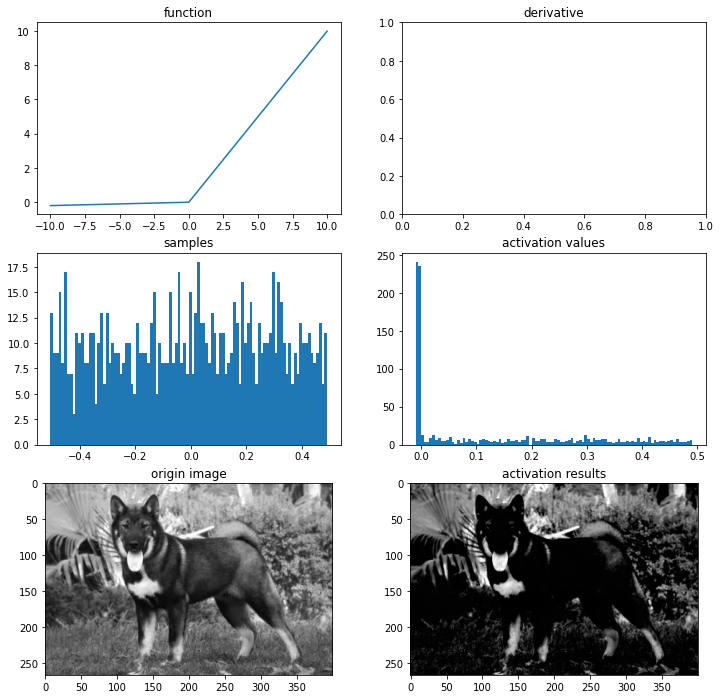

In [27]:
import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'

# leaky relu 함수
def leaky_relu(x):
    return max(0.02*x,x)

# 시각화
ax = plot_and_visulize(img_path, leaky_relu)
ax.show()

## ReLU 단점 극복하기 - PReLU
- Leaky ReLU와 유사하지만 새로운 파라미터를 추가하여 0 미만일 때의 '기울기'가 훈련되게 함.

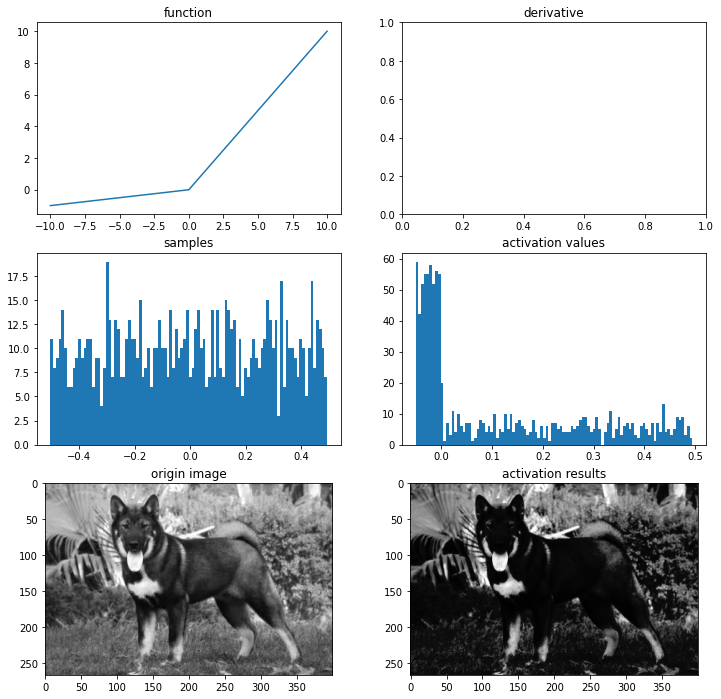

In [28]:
# PReLU 함수
def prelu(x, alpha):
    return max(alpha*x,x)

# 시각화
ax = plot_and_visulize(img_path, lambda x: prelu(x, 0.1)) # parameter alpha=0.1일 때

ax.show()

## ReLU 단점 극복하기 - ELU
- ReLU의 모든 장점을 포함하며, 0이 중심점이 아니었던 단점과, 'Dying ReLU'문제를 해결한 활성화 함수.
- 이 함수의 단점은 exponential 연산이 들어가서 계산 비용이 높아짐.

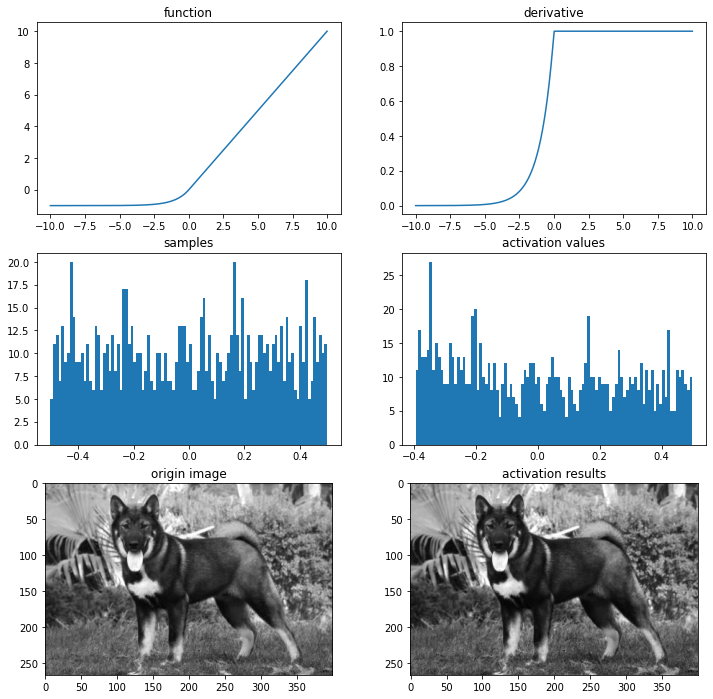

In [29]:
# leaky relu 함수
def elu(x, alpha):
    return x if x > 0 else alpha*(np.exp(x)-1)

def dev_elu(x, alpha):
    return 1 if x > 0 else elu(x, alpha) + alpha

# 시각화
ax = plot_and_visulize(img_path, lambda x: elu(x, 1), lambda x: dev_elu(x, 1)) # alpha가 1일 때
ax.show()